In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential

import pathlib
import matplotlib.pyplot as plt

In [2]:
#load model
new_model = keras.models.load_model('face_detect.h5')

In [6]:
mask_path = (r"C:\Users\Alex\Documents\Universidad\7mo Semestre\VA\Medical mask\Medical mask\Medical Mask\images\5799.jpg")

batch_size = 32
img_height = 180
img_width = 180

img = tf.keras.utils.load_img(
    mask_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

data_dir = r"C:\Users\Alex\Documents\Universidad\7mo Semestre\VA\FPVA\Dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 15ms/step
Found 110 files belonging to 2 classes.
Using 88 files for training.
['WM', 'WoM']
This image most likely belongs to WoM with a 99.92 percent confidence.


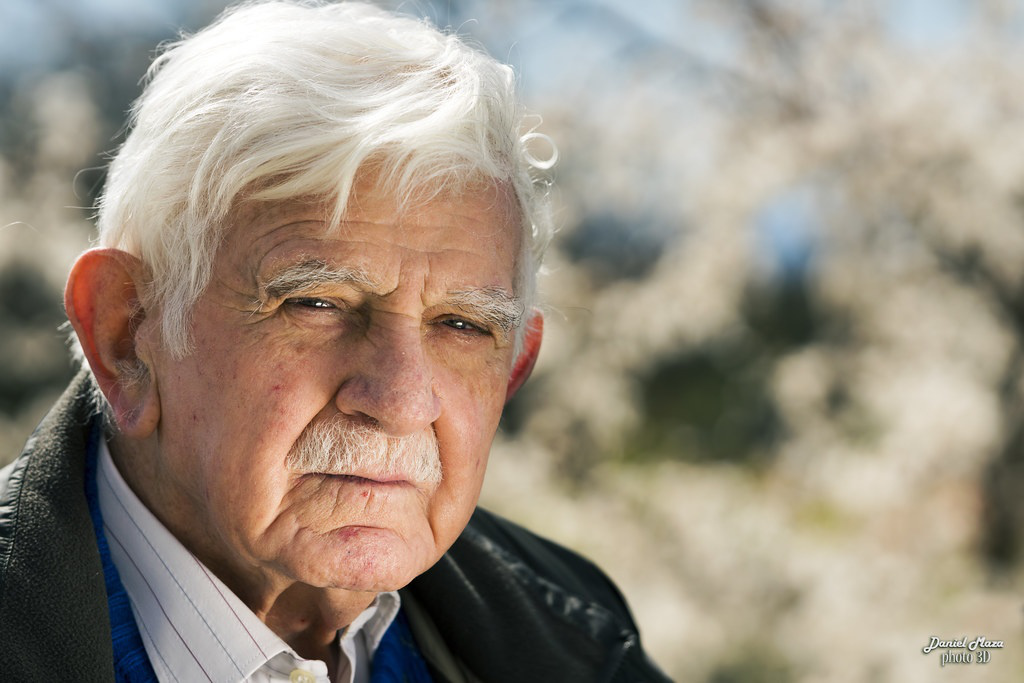

In [7]:
PIL.Image.open(r"C:\Users\Alex\Documents\Universidad\7mo Semestre\VA\Medical mask\Medical mask\Medical Mask\images\5799.jpg")